In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AN_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,NaN,0.778,NaN,NaN,NaN,61.0,NaN
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,NaN,NaN,1.671,NaN,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.00,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.00,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.00,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.00,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	29
float64		column 3	0
float64		column 4	29
float64		column 5	29
float64		column 6	29
float64		column 7	33
float64		column 8	29
float64		column 9	29
float64		column 10	0
float64		column 11	120
float64		column 12	29
float64		column 13	0
float64		column 14	0
float64		column 15	145
float64		column 16	29
float64		column 17	87
float64		column 18	145
float64		column 19	0
float64		column 20	87
float64		column 21	87
float64		column 22	58
float64		column 23	174
float64		column 24	116
float64		column 25	381
float64		column 26	584
float64		column 27	0
float64		column 28	609
float64		column 29	464
float64		column 30	700
float64		column 31	584
float64		column 32	725
float64		column 33	62
float64		column 34	903
float64		column 35	758
float64		column 36	783
float64		column 37	87
float64		column 38	116
float64		column 39	145
float64		column 40	812
float64		column 41	87
float64		column 42	265
float64		column 43	261
float64		col

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4597.000000,4568.000000,4597.000000,4568.000000,4568.000000,4568.000000,4564.00000,4568.000000,4568.000000,4597.000000,...,4539.000000,4365.000000,4423.000000,4452.000000,4568.000000,4216.000000,3988.000000,4129.000000,4191.000000,4187.000000
mean,0.104625,0.213842,0.280433,0.064796,0.313553,0.096182,0.11399,0.105471,0.090116,0.239621,...,0.032199,0.038623,0.138357,0.016784,0.268955,0.076704,0.045528,4.969252,51.528513,281.897779
std,0.305479,1.295086,0.504121,1.398243,0.674345,0.274643,0.39079,0.401968,0.279167,0.644997,...,0.287616,0.242249,0.265387,0.109135,0.814619,0.251581,0.454856,30.393496,197.550387,611.626241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.592000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.272000,15.000000,94.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.00000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.189000,0.000000,0.318000,0.053000,0.000000,3.705000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.27000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

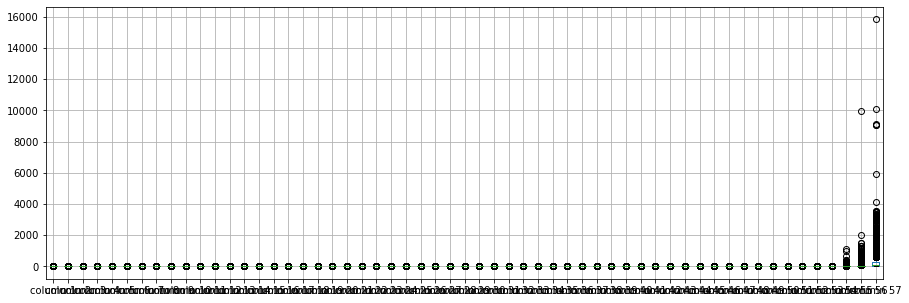

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104625
column 2       0.213842
column 3       0.280433
column 4       0.064796
column 5       0.313553
column 6       0.096182
column 7       0.113990
column 8       0.105471
column 9       0.090116
column 10      0.239621
column 11      0.059448
column 12      0.541784
column 13      0.093833
column 14      0.058599
column 15      0.049326
column 16      0.248441
column 17      0.143450
column 18      0.186231
column 19      1.661710
column 20      0.086486
column 21      0.809481
column 22      0.122842
column 23      0.101872
column 24      0.094713
column 25      0.555738
column 26      0.273818
column 27      0.767973
column 28      0.128185
column 29      0.095158
column 30      0.104842
column 31      0.067374
column 32      0.048045
column 33      0.096492
column 34      0.050717
column 35      0.105957
column 36      0.100813
column 37      0.136086
column 38      0.013207
column 39      0.077835
column 40      0.067089
column 41      0.043965
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016825,0.065814,0.013523,0.023554,0.059162,0.007874,-0.004479,0.105733,0.041115,...,-0.017916,-0.025380,-0.023909,-0.033043,0.058719,0.116395,-0.008568,0.039684,0.056772,0.085671
column 2,-0.016825,1.000000,-0.033616,-0.006846,-0.024263,-0.024905,0.004911,-0.016156,-0.003954,0.032815,...,-0.015871,-0.007780,-0.049324,-0.018359,-0.014730,-0.009524,0.002392,0.004209,-0.000430,-0.019829
column 3,0.065814,-0.033616,1.000000,-0.019909,0.078214,0.088248,0.039834,0.012063,0.094169,0.032257,...,-0.026301,-0.031774,-0.013352,-0.034183,0.109781,0.088160,-0.006075,0.084021,0.101832,0.068389
column 4,0.013523,-0.006846,-0.019909,1.000000,0.003498,-0.009840,0.020166,0.010463,-0.002010,-0.004716,...,-0.004945,-0.002014,-0.012419,-0.007097,-0.003068,0.003905,0.000065,0.007593,0.022287,0.017675
column 5,0.023554,-0.024263,0.078214,0.003498,1.000000,0.055331,0.148198,0.028284,0.020394,0.034096,...,-0.032606,-0.032594,-0.044752,-0.028512,0.023569,0.040130,-0.000278,0.044323,0.047300,-0.003130
column 6,0.059162,-0.024905,0.088248,-0.009840,0.055331,1.000000,0.063153,0.079322,0.117094,0.013487,...,-0.031739,-0.017602,-0.012363,-0.025260,0.060500,0.104642,0.020484,-0.010786,0.085312,0.083249
column 7,0.007874,0.004911,0.039834,0.020166,0.148198,0.063153,1.000000,0.041447,0.046607,0.054983,...,-0.031395,-0.032678,-0.054196,-0.029837,0.053311,0.069577,0.049023,0.042627,0.056723,-0.007446
column 8,-0.004479,-0.016156,0.012063,0.010463,0.028284,0.079322,0.041447,1.000000,0.103688,0.082341,...,-0.021352,-0.026694,-0.032542,-0.020905,0.031768,0.065118,-0.007348,0.010409,0.040137,0.035484
column 9,0.105733,-0.003954,0.094169,-0.002010,0.020394,0.117094,0.046607,0.103688,1.000000,0.130519,...,-0.026651,-0.013967,-0.027875,0.013192,0.043926,0.150510,-0.000261,0.108678,0.185419,0.241849
column 10,0.041115,0.032815,0.032257,-0.004716,0.034096,0.013487,0.054983,0.082341,0.130519,1.000000,...,-0.017914,0.010910,0.005869,0.005221,0.036894,0.073818,0.053157,0.069571,0.102983,0.098188


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+78,17+78+78,17+78+78+78,17+78+78,17+78,17], vae_layer = False, seed = 780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 618.9447680749129
Epoch: 1 , loss: 613.7674579686819
Epoch: 2 , loss: 616.5909211427908
Epoch: 3 , loss: 614.3877608933931
Epoch: 4 , loss: 610.3446615132721
Epoch: 5 , loss: 615.3958885113121
Epoch: 6 , loss: 611.8951927211642
Epoch: 7 , loss: 608.8491650624558
Epoch: 8 , loss: 615.0334413109756
Epoch: 9 , loss: 606.057274263495
Epoch: 10 , loss: 563.5699035431866
Epoch: 11 , loss: 493.07131950032834
Epoch: 12 , loss: 488.6483509449178
Epoch: 13 , loss: 461.85793471917873
Epoch: 14 , loss: 440.98174623496027
Epoch: 15 , loss: 430.9220566433897
Epoch: 16 , loss: 416.60421667863267
Epoch: 17 , loss: 415.02783242999885
Epoch: 18 , loss: 414.5008584796759
Epoch: 19 , loss: 409.46618708168586
Epoch: 20 , loss: 416.4037531410776
Epoch: 21 , loss: 402.5019954987104
Epoch: 22 , loss: 419.746000575687
Epoch: 23 , loss: 402.28411392052413
Epoch: 24 , loss: 408.31248644253935
Epoch: 25 , loss: 409.52573958340423

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.05792,0.0,0.111480,-0.001113,-1.786874,0.000000,-86.918015
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,-0.026674,0.017246,0.000000,2.843395,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

11032.019078137797

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.23245537367469085

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.05792,0.778,0.111480,-0.001113,1.969126,61.000000,191.081985
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.00000,0.372,0.180000,0.048000,5.114000,101.000000,1028.000000
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.00000,0.135,0.000000,0.000000,3.537000,40.000000,191.000000
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.00000,0.000,0.000000,0.000000,3.000000,15.000000,54.000000
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.00000,0.164,0.027326,0.017246,1.671000,6.843395,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.00000,1.160,0.000000,0.000000,3.121000,15.000000,103.000000
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.00000,0.000,0.000000,0.000000,3.043000,15.000000,70.000000
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.00000,0.000,0.000000,0.409000,1.837000,12.000000,68.000000
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.00000,0.065,0.000000,0.000000,1.189000,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_AN_5(imp).xlsx", index=False, header=False)